In [123]:
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer
import time
from sklearn.metrics import balanced_accuracy_score

# Data reading

As a dataset we will use "Otto Group Product Classification Challenge" competition dataset. Each row corresponds to a single product. There are a total of 93 numerical features, which represent counts of different events. All features have been obfuscated and will not be defined any further.

There are nine categories for all products. Each target category represents one of our most important product categories (like fashion, electronics, etc.). I just have used train.csv dataset and split its own to train and test datasets.

URL: https://www.kaggle.com/c/otto-group-product-classification-challenge/data

In [4]:
data = read_csv('train.csv')
data

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,61874,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,2,0,Class_9
61874,61875,4,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,Class_9
61875,61876,0,0,0,0,0,0,0,3,1,...,0,3,1,0,0,0,0,0,0,Class_9
61876,61877,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,10,0,Class_9


In [140]:
del data['id']

XGBoost can automatically learn how to best handle missing data.

In [7]:
data['target'].isnull().sum()

0

In [8]:
data.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


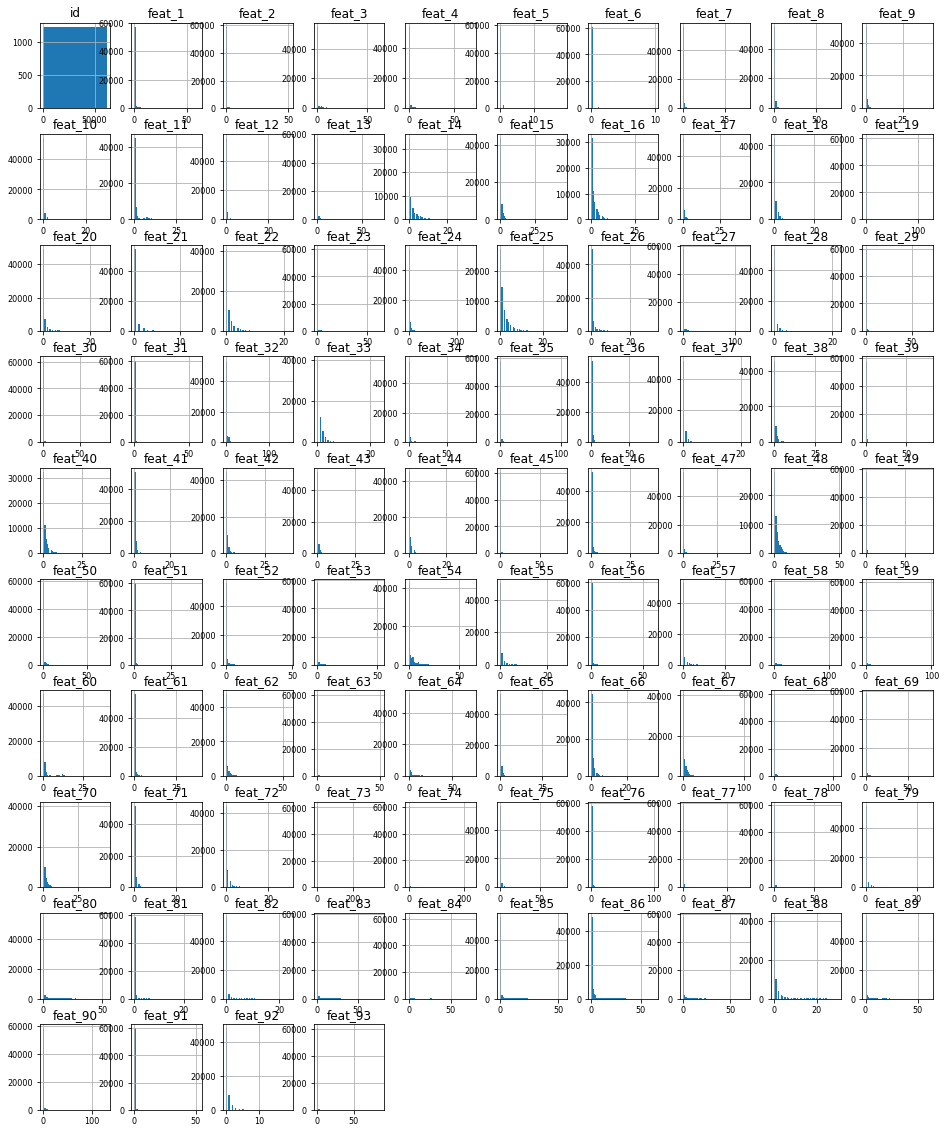

In [131]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

GBoost models represent all problems as a regression predictive modeling problem
that only takes numerical values as input. If your data is in a different form, it must be prepared
into the expected format.

In [87]:
X.select_dtypes(include=['object']).shape

(61878, 0)

# Correlation

In [141]:
df_num_corr = data.corr()['target'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 0 strongly correlated values with SalePrice:
Series([], Name: target, dtype: float64)


As you see we dont have any feature to correlate with each other.

# Histogram of Examples in Each Class

By default, SMOTE will oversample all classes to have the same number of examples as the class with the most examples.

In this case, class 1 has the most examples with 16122 , therefore, SMOTE will oversample all classes to have 16122  examples.

Class=0, n=1929 (3.117%)
Class=1, n=16122 (26.054%)
Class=2, n=8004 (12.935%)
Class=3, n=2691 (4.349%)
Class=4, n=2739 (4.426%)
Class=5, n=14135 (22.843%)
Class=6, n=2839 (4.588%)
Class=7, n=8464 (13.679%)
Class=8, n=4955 (8.008%)


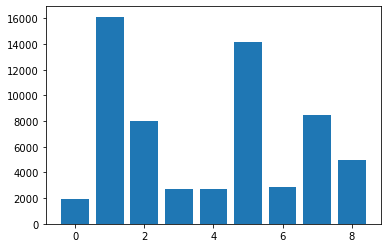

In [39]:
from collections import Counter
from matplotlib import pyplot
counter = Counter(label_encoded_y)

for k,v in counter.items():
    per = v / len(label_encoded_y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [10]:
data.shape

(61878, 95)

# Splitting into train and test set

In [144]:
X = data.iloc[:,0:93]
Y = data.iloc[:,93]

In [21]:
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)

In [22]:
seed = 7
test_size = 0.33

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, label_encoded_y, test_size=test_size, random_state=seed)

In [29]:
print(y_train.shape, X_train.shape)
print(y_test.shape, X_test.shape)

(41458,) (41458, 93)
(20420,) (20420, 93)


# Baseline XGBoost

In [30]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [59]:
from sklearn.metrics import balanced_accuracy_score

predictions = model.predict(X_test)

balanced = balanced_accuracy_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)

print("Accuracy: %.2f%%" %(accuracy*100.0))
print("Balanced accuracy: %.2f%%" %(balanced*100.0))

Accuracy: 76.87%
Balanced accuracy: 67.33%


# Cross validation - Baseline model

In [52]:
metric = make_scorer(balanced_accuracy_score)

In [55]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = StratifiedKFold(n_splits=10, random_state=7,  shuffle=True)
results = cross_val_score(model, X_train, y_train,scoring=metric, cv=kfold)

# Baseline XGBoost with SMOTE Oversampling

Oversampling refers to copying or synthesizing new examples of the minority classes. The most widely used approach to synthesizing new examples is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short. This technique was described by Nitesh Chawla, et al. in their 2002 paper named for the technique titled “SMOTE: Synthetic Minority Over-sampling Technique.”

In [73]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
oversample_X, oversample_y = oversample.fit_resample(X_train, y_train)

In [77]:
b_counter = Counter(y_train)
a_counter = Counter(oversample_y)
print('Before: ', b_counter)
print('After: ', a_counter)

Before:  Counter({1: 10807, 5: 9501, 7: 5719, 2: 5328, 8: 3289, 6: 1908, 4: 1821, 3: 1782, 0: 1303})
After:  Counter({7: 10807, 2: 10807, 0: 10807, 8: 10807, 5: 10807, 1: 10807, 4: 10807, 3: 10807, 6: 10807})


In [78]:
model = XGBClassifier()
model.fit(oversample_X, oversample_y)


predictions = model.predict(X_test)

balanced = balanced_accuracy_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)

print("Accuracy: %.2f%%" %(accuracy*100.0))
print("Balanced accuracy: %.2f%%" %(balanced*100.0))

Accuracy: 73.45%
Balanced accuracy: 73.08%


#### As you see, our balanced accuracy encreased from 67.33 to 73.08.

# Baseline XGBoost Combined Data Sampling Methods

Almost any oversampling method can be combined with almost any undersampling technique.
Therefore, it may be beneficial to test a suite of different combinations of oversampling and
undersampling techniques. 

In [82]:
from imblearn.combine import SMOTEENN
resample = SMOTEENN()

resample_X, resample_y = resample.fit_resample(X_train, y_train)

b_counter = Counter(y_train)
a_counter = Counter(resample_y)
print('Before: ', b_counter)
print('After: ', a_counter)

Before:  Counter({1: 10807, 5: 9501, 7: 5719, 2: 5328, 8: 3289, 6: 1908, 4: 1821, 3: 1782, 0: 1303})
After:  Counter({4: 10722, 0: 10120, 6: 9941, 8: 9799, 3: 9715, 7: 9374, 5: 8799, 2: 6671, 1: 3571})


In [83]:
model.fit(resample_X, resample_y)


r_predictions = model.predict(X_test)

r_balanced = balanced_accuracy_score(y_test, r_predictions)
r_accuracy = accuracy_score(y_test, r_predictions)

print("Accuracy: %.2f%%" %(r_accuracy*100.0))
print("Balanced accuracy: %.2f%%" %(r_balanced*100.0))

Accuracy: 68.68%
Balanced accuracy: 73.15%


#### As you see, our balanced accuracy encreased from 67.33 to 73.15.

# Weighted XGBoost

XGBoost algorithm performs well for a wide range of challenging problems, it offers a large number of hyperparameters, many of which require tuning in order to get the most out of the algorithm on a given dataset.

Gradients are used as the basis for fitting subsequent trees added to boost or correct error  made by the existing state of the ensemble of decision trees. The scale pos weight value is used to scale the gradient for the positive class. This has the effect of scaling errors made by the model during training on the positive class and encourages the model to over-correct them.

In turn, this can help the model achieve better performance when making predictions on the
positive class. Pushed too far, it may result in the model overfitting the positive class at the
cost of worse performance on the negative class or both classes.


In [116]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train)

w_model = XGBClassifier()
w_model.fit(X_train, y_train, sample_weight=classes_weights)

w_predictions = w_model.predict(X_test)

In [118]:
balanced = balanced_accuracy_score(y_test, w_predictions)
accuracy = accuracy_score(y_test, w_predictions)

print("Accuracy: %.2f%%" %(accuracy*100.0))
print("Balanced accuracy: %.2f%%" %(balanced*100.0))

Accuracy: 73.21%
Balanced accuracy: 74.01%


#### As you see, our balanced accuracy encreased from 67.33 to 74.01.

__If you face with imbalance dataset and want to use XGBoost, be aware of that Weighted XGBoost may work better than standart resampling methods__

#  Monitoring train performance

Overfitting is a problem with sophisticated nonlinear learning algorithms like gradient boosting. XGBoost supports this capability by specifying both an test dataset and an evaluation metric on the call to model.fit() when training the model and specifying verbose output.

Multiclass classification error rate. It is calculated as __(wrong cases)/(all cases)__.

In [104]:
eval_set = [(X_train, y_train), (X_test, y_test)]
w_model.fit(X_train, y_train, eval_metric="merror", sample_weight=classes_weights, eval_set=eval_set, verbose=True)

[0]	validation_0-merror:0.401587	validation_1-merror:0.402057
[1]	validation_0-merror:0.381326	validation_1-merror:0.383643
[2]	validation_0-merror:0.371605	validation_1-merror:0.377767
[3]	validation_0-merror:0.359882	validation_1-merror:0.363859
[4]	validation_0-merror:0.354335	validation_1-merror:0.36097
[5]	validation_0-merror:0.346857	validation_1-merror:0.354309
[6]	validation_0-merror:0.341309	validation_1-merror:0.349363
[7]	validation_0-merror:0.33909	validation_1-merror:0.346866
[8]	validation_0-merror:0.33716	validation_1-merror:0.344417
[9]	validation_0-merror:0.335858	validation_1-merror:0.343487
[10]	validation_0-merror:0.333422	validation_1-merror:0.340695
[11]	validation_0-merror:0.330141	validation_1-merror:0.33761
[12]	validation_0-merror:0.326186	validation_1-merror:0.333888
[13]	validation_0-merror:0.325172	validation_1-merror:0.331881
[14]	validation_0-merror:0.324738	validation_1-merror:0.331146
[15]	validation_0-merror:0.32276	validation_1-merror:0.329334
[16]	va

XGBClassifier(objective='multi:softprob')

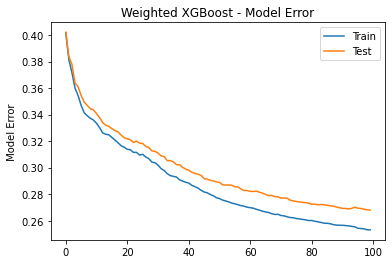

In [106]:
results = w_model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0,epochs)
fig, ax = pyplot.subplots()
ax.plot(x_axis, results[ 'validation_0' ][ 'merror' ], label= 'Train' )
ax.plot(x_axis, results[ 'validation_1' ][ 'merror' ], label= 'Test' )
ax.legend()
pyplot.ylabel( ' Model Error ' )
pyplot.title( ' Weighted XGBoost - Model Error ' )
pyplot.show()


# Early Stopping 

XGBoost supports early stopping after a fixed number of iterations. In addition to specifying a
metric and test dataset for evaluation each epoch, you must specify a window of the number of
epochs over which no improvement is observed. This is specified in the early stopping rounds
parameter.

In [121]:
eval_set = [(X_test, y_test)]
w_model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="merror",eval_set=eval_set, verbose=True)

[0]	validation_0-merror:0.356024
Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.32713
[2]	validation_0-merror:0.322723
[3]	validation_0-merror:0.315524
[4]	validation_0-merror:0.307101
[5]	validation_0-merror:0.304261
[6]	validation_0-merror:0.301959
[7]	validation_0-merror:0.298384
[8]	validation_0-merror:0.296523
[9]	validation_0-merror:0.293585
[10]	validation_0-merror:0.292165
[11]	validation_0-merror:0.290744
[12]	validation_0-merror:0.289618
[13]	validation_0-merror:0.288541
[14]	validation_0-merror:0.285847
[15]	validation_0-merror:0.283252
[16]	validation_0-merror:0.282321
[17]	validation_0-merror:0.282272
[18]	validation_0-merror:0.281342
[19]	validation_0-merror:0.278844
[20]	validation_0-merror:0.277718
[21]	validation_0-merror:0.2762
[22]	validation_0-merror:0.27571
[23]	validation_0-merror:0.274339
[24]	validation_0-merror:0.273115
[25]	validation_0-merror:0.272576
[26]	validation_0-merror:0.270617
[27]	validation_0-merror:0.26

XGBClassifier(objective='multi:softprob')

# Multithreading support for XGBoost

The XGBoost library for gradient boosting uses is designed for efficient multi-core parallel
processing. This allows it to efficiently use all of the CPU cores in your system when training.

The XGBClassifier
and XGBRegressor wrapper classes for XGBoost for use in scikit-learn provide the nthread
parameter to specify the number of threads that XGBoost can use during training.
By default this parameter is set to -1 to make use of all of the cores in your system

In [129]:
results = []
num_threads=[1,2,3,4,5,6,7,8]

for n in num_threads:
    start =time.time()
    model = XGBClassifier(nthread=n)
    model.fit(X_train, y_train)
    elapsed = time.time() - start
    print(n, elapsed)
    results.append(elapsed)


1 114.57355666160583
2 66.64184951782227
3 56.04189896583557
4 49.06010842323303
5 47.80325675010681
6 43.59668707847595
7 40.563720703125
8 39.64261245727539


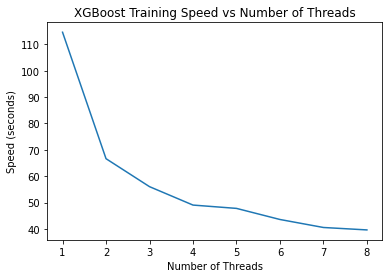

In [130]:
pyplot.plot(num_threads, results)
pyplot.ylabel('Speed (seconds)')
pyplot.xlabel('Number of Threads')
pyplot.title('XGBoost Training Speed vs Number of Threads')
pyplot.show()

We have used XGBoost in sample dataset, but there is still a lot more to learn. I hope this notebook was helpful :)